In [1]:
import numpy as np

Number of valid parameter combinations: 104297


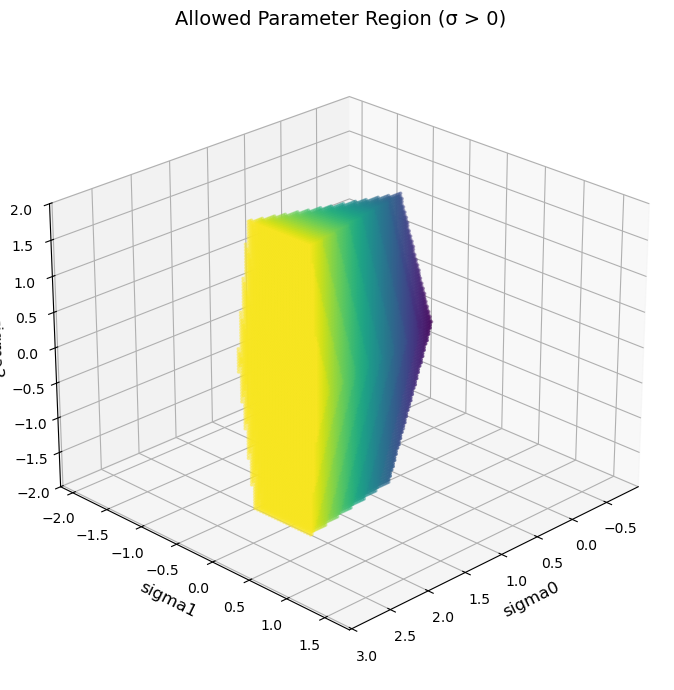


Allowed parameter intervals (marginal bounds):
p1 ∈ [0.0606, 2.0000]
p2 ∈ [-0.7071, 0.3434]
p3 ∈ [-2.0000, 2.0000]


In [15]:
import numpy as np

mp = 10**14.3
zp = 0.5

def sigma(p, A, B):
    p1, p2, p3 = p
    return p1 + p2*A + p3*B

# Compute extrema of A(m) and B(z)
m_min, m_max = 1e12, 10**15.5
z_min, z_max = 0.2, 1.0

A_min = np.log(m_min/mp)
A_max = np.log(m_max/mp)

B_min = np.log((1+z_min)/(1+zp))
B_max = np.log((1+z_max)/(1+zp))

p1_interval = np.linspace(0.0, 2.0, 100)
p2_interval = np.linspace(-2.0, 2.0, 100)
p3_interval = np.linspace(-2.0, 2.0, 100)

valid_points = []

for p1 in p1_interval:
    for p2 in p2_interval:
        for p3 in p3_interval:
            
            p = [p1, p2, p3]
            
            # evaluate at 4 corners
            values = [
                sigma(p, A_min, B_min),
                sigma(p, A_min, B_max),
                sigma(p, A_max, B_min),
                sigma(p, A_max, B_max),
            ]
            
            if min(values) > 0:
                valid_points.append([p1, p2, p3])

valid_points = np.array(valid_points)

print("Number of valid parameter combinations:", len(valid_points))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

if len(valid_points) == 0:
    print("No valid parameter combinations found.")
else:

    p1_vals = valid_points[:,0]
    p2_vals = valid_points[:,1]
    p3_vals = valid_points[:,2]

    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111, projection='3d')

    sc = ax.scatter(
        p1_vals,
        p2_vals,
        p3_vals,
        c=p1_vals,              # color by p1
        cmap='viridis',
        s=3,
        alpha=0.4,
        depthshade=True
    )

    # Labels
    ax.set_xlabel("sigma0", fontsize=12)
    ax.set_ylabel("sigma1", fontsize=12)
    ax.set_zlabel("sigma2", fontsize=12)

    # Equal scaling
    max_range = np.array([
        p1_vals.max()-p1_vals.min(),
        p2_vals.max()-p2_vals.min(),
        p3_vals.max()-p3_vals.min()
    ]).max() / 2.0

    mid_x = (p1_vals.max()+p1_vals.min()) * 0.5
    mid_y = (p2_vals.max()+p2_vals.min()) * 0.5
    mid_z = (p3_vals.max()+p3_vals.min()) * 0.5

    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    # Better viewing angle
    ax.view_init(elev=25, azim=45)


    plt.title("Allowed Parameter Region (σ > 0)", fontsize=14)
    plt.tight_layout()
    plt.show()

if len(valid_points) == 0:
    print("No valid parameter combinations found.")
else:
    p1_min, p1_max = valid_points[:,0].min(), valid_points[:,0].max()
    p2_min, p2_max = valid_points[:,1].min(), valid_points[:,1].max()
    p3_min, p3_max = valid_points[:,2].min(), valid_points[:,2].max()

    print("\nAllowed parameter intervals (marginal bounds):")
    print(f"p1 ∈ [{p1_min:.4f}, {p1_max:.4f}]")
    print(f"p2 ∈ [{p2_min:.4f}, {p2_max:.4f}]")
    print(f"p3 ∈ [{p3_min:.4f}, {p3_max:.4f}]")